# **Aplicaciones Financieras de ML & AI**
## **Examen II:** *Objetos Financieros Parte II*

#### Nombre: Julio César Avila Torreblanca

- **Problema 2:**:
    1. Cree un portafolio que invierta en distintas divisas (divisas a su elección), ¿Qué método utilizó y qué criterio lo hizo decantarse por algún portafolio?.
    2. Cree otro portafolio y muestre cómo se desempeñan ambos portafolios en un periodo de tiempo (es decir, escoja un portafolio y grafique cómo se modifica
el valor de su inversión, diario, durante un año)


- **Contenido del notebook**:
    1. Librerías y parámetros
    2. Primer portafolio
    3. Segundo Portafolio
    6. Conclusiones



# 1. Librerías y parámetros

In [2]:
!pip install Riskfolio-Lib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.8/314.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 12.6 MB/s eta 0:00:00


In [60]:
# data
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import yfinance as yf

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
import cvxopt as opt
from sklearn.model_selection import train_test_split
import riskfolio as rp

# 2. Primer porfatolio
Tomaremos las siguientes divisas:
- EURUSD
- USDJPY
- GBPUSD
- AUDUSD
- USDCAD
- EURGBP

Fueron escogidas aleatoreamente de yahoofinance. Usaremos HRP para generar nuestro portafolio de inversión.

## 2.1 Lectura de datos

In [7]:
tickers = ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'AUDUSD=X', 'USDCAD=X', 'EURGBP=X']
data = yf.download(
        tickers =tickers,
        period = "1y", # one year information
        interval = "1d", # daily information
    ).loc[:, 'Close']

data = data.rename(columns={col: col.split('=')[0] for col in tickers})

data.head()

[*********************100%***********************]  6 of 6 completed


Ticker,AUDUSD,EURGBP,EURUSD,GBPUSD,USDCAD,USDJPY
Date,,,,,,
2024-04-04,0.656900,0.85664,1.083835,1.265182,1.35238,151.580994
2024-04-05,0.658770,0.85720,1.083705,1.264019,1.35445,151.292007
2024-04-08,0.657022,0.85782,1.083048,1.262531,1.36041,151.690002
2024-04-09,0.660500,0.85806,1.086366,1.265871,1.35708,151.843002
2024-04-10,0.662850,0.85644,1.085930,1.267765,1.35729,151.776993


## 2.2 Preparación de los datos

In [11]:
data_returns = np.log(data.iloc[:-20,:] / data.iloc[:-20,:].shift()) * 252 # Para anualizar los retornos
data_returns.dropna(inplace = True)
data_returns.head()

Ticker,AUDUSD,EURGBP,EURUSD,GBPUSD,USDCAD,USDJPY
Date,,,,,,
2024-04-05,0.716478,0.164696,-0.030047,-0.231684,0.385416,-0.480892
2024-04-08,-0.669791,0.182187,-0.152897,-0.297013,1.106443,0.662051
2024-04-09,1.330553,0.070503,0.770858,0.665853,-0.617598,0.254048
2024-04-10,0.895083,-0.476219,-0.101284,0.376690,0.039001,-0.109574
2024-04-11,-4.654220,0.105908,-2.743453,-2.798989,2.109572,1.963165


In [16]:
ganancia_mes_final =  data_returns.iloc[-1,:] / data_returns.iloc[1,:]
ganancia_mes_final

,0
Ticker,
AUDUSD,1.458152
EURGBP,3.356164
EURUSD,3.218791
GBPUSD,3.744282
USDCAD,0.928472
USDJPY,-1.392461


In [27]:
data_returns_train = data_returns.iloc[:-20,:]
data_returns_test = data_returns.iloc[:-20,:]

## 2.3 Modeling

## 2.3.1 Train

In [28]:
portfolio = rp.HCPortfolio(returns=data_returns_train)

# optimal portfolio

w = portfolio.optimization(
    model='HRP',
    codependence='pearson',
)

w


,weights
AUDUSD,0.037114
EURGBP,0.455120
EURUSD,0.069075
GBPUSD,0.102453
USDCAD,0.261260
USDJPY,0.074979


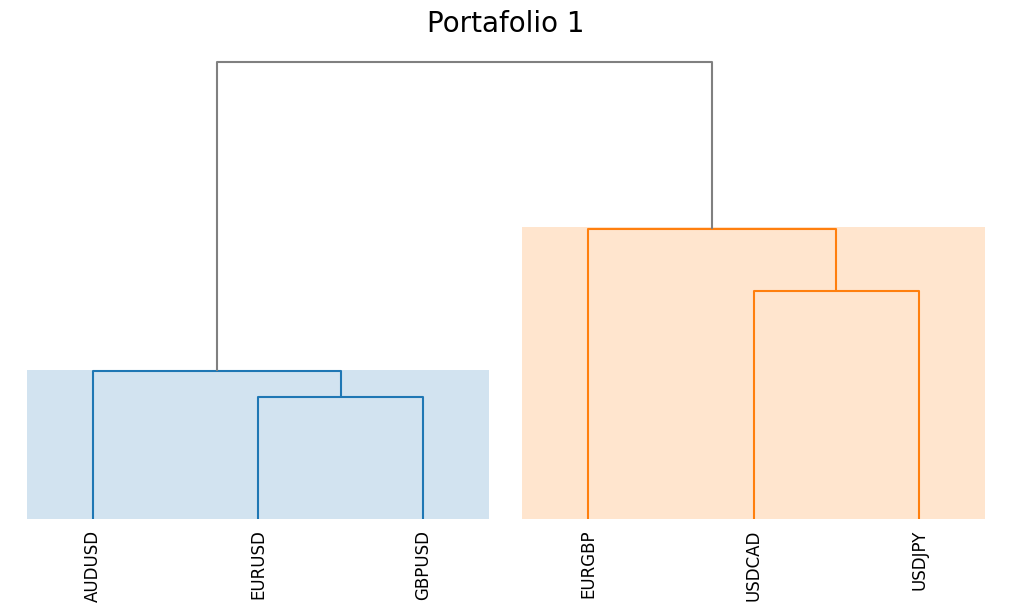

In [30]:
fig, ax = plt.subplots(figsize=(10,6))

rp.plot_dendrogram(
    returns=data_returns_train,
    codependence='pearson',
    ax=ax
  )

ax.set(
    title = 'Portafolio 1')
ax.title.set_size(20)
plt.show()


Vemos que el algoritmo nos ha agrupado aquellas divisas que tienen una correlación de pearson alta.
- En el grupo azul tene tenemos AUD/USD, EUR/USD y GBP/USD, indicando que sus movimientos en los :precios son similares.
- En el grupo naranja tene tenemos EUR/GBP, USD/CAD y USD/JPY, teniendo la misma interpretación.

Por otro lado, usando los primeros 11 meses para obtener nuestro portafolio óptimo se nos sugiere dividirlod de la siguiente forma:
- AUDUSD: 3.7%
- EURGBP:	45.5 %
- EURUSD:	7.0 %
- GBPUSD:	10.2 %
- USDCAD:	26.1 %
- USDJPY:	7.5 %

Veamos cuanto tendriamos de ganancia en el mes 12 y corroboremos.

### 2.3.2 Test

Tomaremos una simulación con $10,000.00

In [42]:
ganancia_mes_final =  data_returns_test.iloc[-1,:] / data_returns_test.iloc[1,:]
ganancia_mes_final

,0
Ticker,
AUDUSD,-0.743698
EURGBP,2.209119
EURUSD,1.613710
GBPUSD,2.121157
USDCAD,0.076276
USDJPY,-0.218123


In [51]:
# division de capital
money_init = 10_000

money_portfolio = w * money_init

money_end = np.dot(money_portfolio.T, ganancia_mes_final)[0]

print(f'Dinero inicial: ${money_init:,.2f}')
print(f'Dinero final (1 mes de inversión): ${money_end:,.2f}')
print(f'Retorno final: {money_end/money_init*100:.2f}%')

Dinero inicial: $10,000.00
Dinero final (1 mes de inversión): $13,101.72
Retorno final: 131.02%


Suponiendo que inviertes $10,000, después de cuatro semanas (20 días hábiles) se hubiera tenido una ganancia del 31%.

# 3. Segundo porfatolio
Aquí tomaremos una combinación de divisas (la misma de antes), y el precio de algunas acciones:
- EURUSD
- USDJPY
- GBPUSD
- AUDUSD
- USDCAD
- EURGBP
- TSLA
- GOOGL
- NVDA
- MSFT
- GSPC

Esto se escogió para tener diversificación en el portafolio. Usaremos HRP y Markovitz para obtener los portafolios. También tomaremos 2 años de información, donde el primero será para crear nuestro portafolio y el segundo para simular nuestras ganancias diarias.

## 3.1 Lectura de datos

In [57]:
tickers = ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'AUDUSD=X', 'USDCAD=X', 'EURGBP=X',
            'TSLA', 'GOOGL', 'NVDA', 'MSFT', '^GSPC']
data = yf.download(
        tickers =tickers,
        period = "2y", # one year information
        interval = "1d", # daily information
    ).loc[:, 'Close']


data.head()


[*********************100%***********************]  11 of 11 completed


Ticker,AUDUSD=X,EURGBP=X,EURUSD=X,GBPUSD=X,GOOGL,MSFT,NVDA,TSLA,USDCAD=X,USDJPY=X,^GSPC
Date,,,,,,,,,,,
2023-04-04,0.678850,0.87805,1.091227,1.242313,NaN,NaN,NaN,NaN,1.34337,132.298996,NaN
2023-04-05,0.675808,0.87661,1.096011,1.249844,103.972908,279.888489,26.863554,185.520004,1.34380,131.485001,4090.379883
2023-04-06,0.671668,0.87483,1.090334,1.246308,107.904114,287.034851,27.019455,185.059998,1.34543,130.934006,4105.020020
2023-04-07,0.667601,0.87787,1.092013,1.243900,NaN,NaN,NaN,NaN,1.34950,131.669006,NaN
2023-04-10,0.667350,0.87781,1.091358,1.243163,105.933540,284.859467,27.561100,184.509995,1.35040,132.097000,4109.109863


## 3.2 Transformación de los datos

In [58]:
data_returns = np.log(data.iloc[:-20,:] / data.iloc[:-20,:].shift()) * 252 # Para anualizar los retornos
data_returns.dropna(inplace = True)
data_returns.head()

Ticker,AUDUSD=X,EURGBP=X,EURUSD=X,GBPUSD=X,GOOGL,MSFT,NVDA,TSLA,USDCAD=X,USDJPY=X,^GSPC
Date,,,,,,,,,,,
2023-04-06,-1.548418,-0.512211,-1.308534,-0.713930,9.352383,6.353518,1.458239,-0.625623,0.305498,-1.058238,0.900339
2023-04-11,-0.953418,-0.224017,-1.023760,-0.800690,-2.593919,-5.778231,-3.774427,3.094893,-0.011190,2.603839,-0.010421
2023-04-12,0.216053,0.315870,1.114525,0.788172,-1.704082,0.587418,-6.330408,-8.576223,-0.764424,0.235899,-1.044151
2023-04-13,1.698445,0.607639,1.894445,1.246727,6.631008,5.582320,-0.304555,7.372648,-0.421536,-0.961943,3.320229
2023-04-14,3.177302,0.566204,1.250478,0.657564,3.355414,-3.237644,2.793688,-1.222965,-1.882008,-1.134894,-0.522022


## 3.3 Construcción de Portafolio

In [62]:
data_train, data_test = train_test_split(data_returns, test_size=0.5, shuffle=False)

print(data_train.shape)
print(data_test.shape)


(231, 11)
(231, 11)


### 3.3.1 HRP

In [63]:
portfolio = rp.HCPortfolio(returns=data_train)

# optimal portfolio

w = portfolio.optimization(
    model='HRP',
    codependence='pearson',
)

w


,weights
AUDUSD=X,0.064467
EURGBP=X,0.477303
EURUSD=X,0.077868
GBPUSD=X,0.069086
GOOGL,0.002604
MSFT,0.004023
NVDA,0.000730
TSLA,0.000671
USDCAD=X,0.210024
USDJPY=X,0.078932


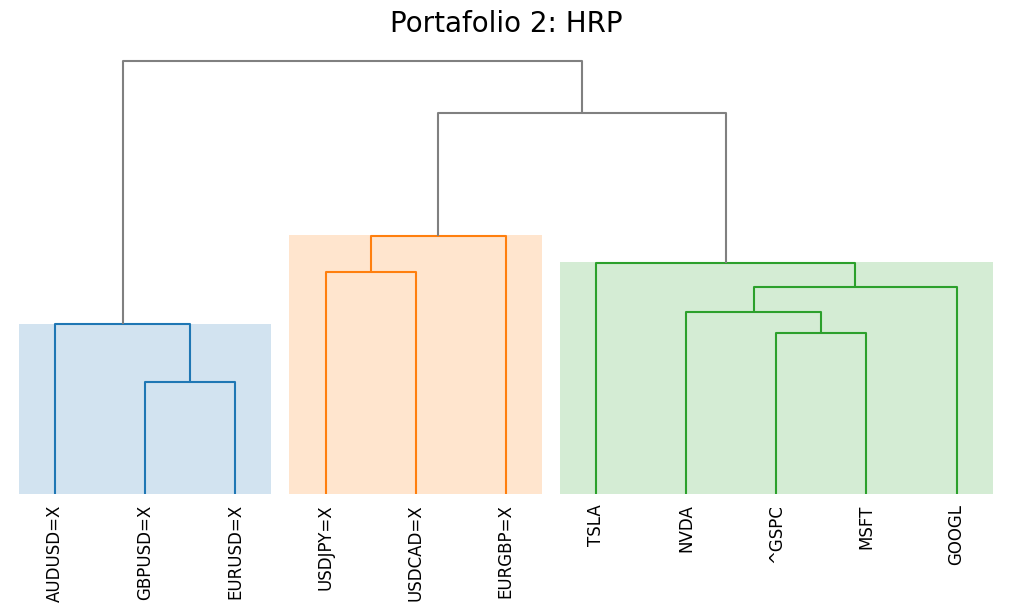

In [65]:
fig, ax = plt.subplots(figsize=(10,6))

rp.plot_dendrogram(
    returns=data_train,
    codependence='pearson',
    ax=ax
  )

ax.set(
    title = 'Portafolio 2: HRP')
ax.title.set_size(20)
plt.show()

### 3.3.2 Markovitz

In [67]:
# promedio de los retornos en el primer año
mean_returns = data_train.mean()
mean_returns

,0
Ticker,
AUDUSD=X,-0.012229
EURGBP=X,-0.017520
EURUSD=X,0.013950
GBPUSD=X,0.033252
GOOGL,0.414160
MSFT,0.483923
NVDA,1.312715
TSLA,-0.229046
USDCAD=X,-0.006801


In [70]:
# mstirz de covarianza en el primer año
cov_returns = data_train.cov()
cov_returns

Ticker,AUDUSD=X,EURGBP=X,EURUSD=X,GBPUSD=X,GOOGL,MSFT,NVDA,TSLA,USDCAD=X,USDJPY=X,^GSPC
Ticker,,,,,,,,,,,
AUDUSD=X,2.421664,-0.120841,1.028208,1.143449,0.621630,0.048858,-0.011048,2.310964,-1.007744,-1.092994,0.303138
EURGBP=X,-0.120841,0.424127,0.141954,-0.282353,-0.160902,0.008706,-0.325833,0.010829,0.111810,0.011614,-0.043999
EURUSD=X,1.028208,0.141954,1.102613,0.959637,0.560952,0.046428,0.072355,1.169316,-0.447990,-0.659525,0.184449
GBPUSD=X,1.143449,-0.282353,0.959637,1.242780,0.718463,0.040496,0.392125,1.128646,-0.558917,-0.662818,0.226944
GOOGL,0.621630,-0.160902,0.560952,0.718463,19.960736,6.862373,11.958729,9.449712,-0.212118,-0.472412,4.568471
MSFT,0.048858,0.008706,0.046428,0.040496,6.862373,12.922406,13.737822,7.563329,-0.029785,-0.270668,4.196216
NVDA,-0.011048,-0.325833,0.072355,0.392125,11.958729,13.737822,53.819144,14.836284,-0.237942,0.224106,7.898767
TSLA,2.310964,0.010829,1.169316,1.128646,9.449712,7.563329,14.836284,58.565105,-1.253316,-1.078181,7.485489
USDCAD=X,-1.007744,0.111810,-0.447990,-0.558917,-0.212118,-0.029785,-0.237942,-1.253316,0.767189,0.360018,-0.251030


In [74]:
# solución a las ecuaciones de markovitz para múltiples retornos de inversión

mu_stars = np.linspace(.0, .6, 51)  # multiple expected return
k = data_train.shape[1] # numero de activos

G = opt.matrix(-np.concatenate([mean_returns.to_numpy().reshape(1, k),np.eye(k)]), tc = 'd')
q = opt.matrix(0.0, (k, 1))
A = opt.matrix(1.0, (1, k))
b = opt.matrix(1.0)
P = opt.matrix(2 * cov_returns.to_numpy(), tc = 'd')

ws = np.zeros((len(mu_stars), k))
mus = np.zeros(len(mu_stars))
sigmas = np.zeros(len(mu_stars))

for i, mu_star in enumerate(mu_stars):
    try:
        h = opt.matrix(np.concatenate([np.array([-mu_star]).reshape((1, 1)), np.zeros((k, 1))]), tc = 'd')
        results = opt.solvers.qp(P, q, G, h, A, b)

        w = np.asarray(results['x']).reshape((-1))
        ws[i, :] = w
        mus[i] = np.dot(mean_returns, w)
        sigmas[i] = np.sqrt(results['primal objective'])
    except:
        print('domain error')

     pcost       dcost       gap    pres   dres
 0:  7.3332e-02 -1.0452e+00  2e+01  3e+00  5e+00
 1:  1.1577e-01 -8.0002e-01  1e+00  8e-02  1e-01
 2:  9.8638e-02 -3.6582e-02  1e-01  8e-03  1e-02
 3:  7.4451e-02  5.4811e-02  2e-02  7e-04  1e-03
 4:  6.7688e-02  6.6224e-02  1e-03  9e-06  1e-05
 5:  6.7125e-02  6.7051e-02  7e-05  3e-07  4e-07
 6:  6.7074e-02  6.7073e-02  1e-06  3e-09  4e-09
 7:  6.7073e-02  6.7073e-02  1e-08  3e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.3409e-02 -1.0306e+00  2e+01  3e+00  5e+00
 1:  1.1694e-01 -7.8846e-01  1e+00  8e-02  1e-01
 2:  1.0044e-01 -3.3873e-02  1e-01  8e-03  1e-02
 3:  7.5111e-02  5.5411e-02  2e-02  7e-04  1e-03
 4:  6.7760e-02  6.6089e-02  2e-03  9e-06  1e-05
 5:  6.7122e-02  6.7034e-02  9e-05  2e-07  3e-07
 6:  6.7074e-02  6.7073e-02  1e-06  2e-09  3e-09
 7:  6.7073e-02  6.7073e-02  1e-08  2e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.3490e-02 -1.0158e

In [75]:
import plotly.graph_objects as go

## Portfolios of an optimal frontier
fig = go.Figure()

fig.add_traces(
    [
        go.Scatter(
            x = volatilities, y = returns,
            marker = dict(
                color = sharpe_ratios,
                colorbar = dict(title="Razón de Sharpe")
            ),
            mode = 'markers',
            showlegend = False
        ),
        go.Scatter(
            x = sigmas, y = mus,
            mode = 'lines + markers',
            showlegend = False
        )
])

fig.update_layout(
    xaxis_title = 'Volatilidad',
    yaxis_title = 'Retorno'
)

NameError: name 'volatilities' is not defined